In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
response = requests.get('https://api.covid19india.org/states_daily.json')

df = pd.DataFrame(response.json()['states_daily'])
df = df.set_index(['date','status'])
df.columns = [i.upper() for i in list(df.columns)]

df = df.astype(int)

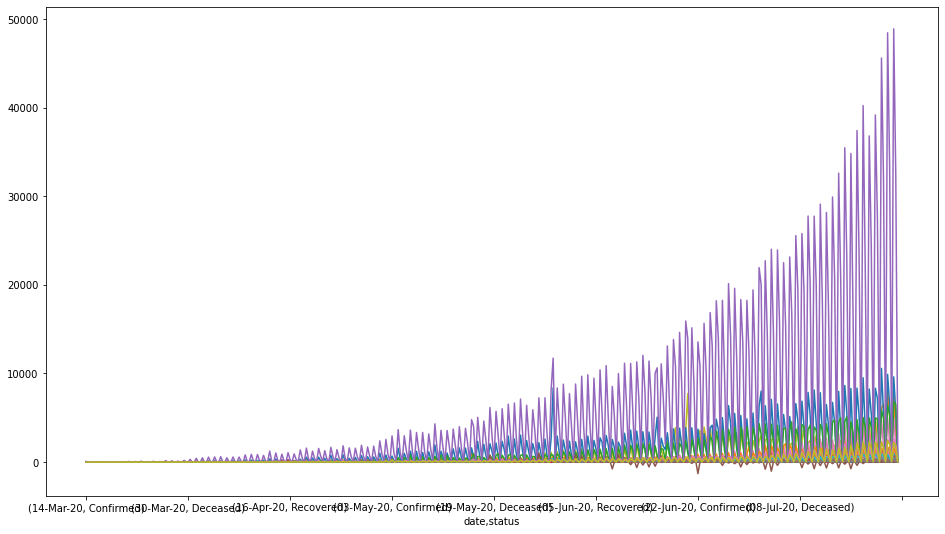

In [3]:
df.plot(legend=False,figsize=(16,9))

In [4]:
to_plot = pd.DataFrame()
for i in df.index.levels[0]:
    to_plot = to_plot.append(pd.Series(df.loc[i].loc['Confirmed'], name=i))

to_plot.index = pd.to_datetime(to_plot.index)

to_plot = to_plot.sort_index()

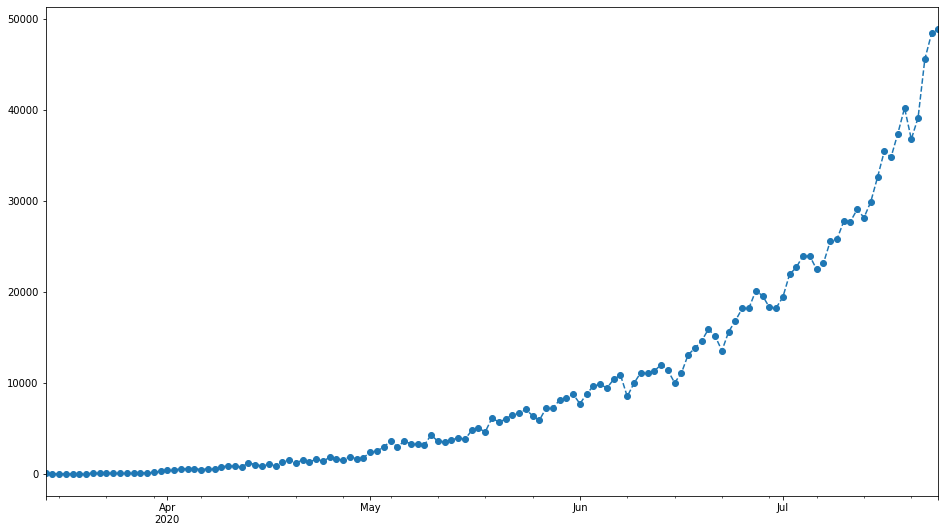

In [5]:
to_plot['TT'].plot(kind='line',figsize=(16,9),style='--o')